# Random numbers


[File as PDF](https://github.com/fcichos/CBPM24/blob/ab29d2f9a566d5402ae9deca1cecd51592c81117/source/notebooks/L2/3_randomnumbers.pdf)

Random numbers are widely used in science and engineering computations. They can be used to simulate noisy data, or to model physical phenomena like the distribution of velocities of molecules in a gas, or to act like the roll of dice in a game. Monte Carlo simulation techniques, which will be part of a later theory lecture rely heavily and random number. Processes like single photon emission or Brownian motion are stochastic processes, with an intrisic randomness as well. But there are even methods for numerically evaluating multi-dimensional integrals using random numbers. 


The basic idea of a random number generator is that it should be able to produce a sequence of numbers that are distributed according to some predetermined distribution function. NumPy provides a number of such random number generators in its library `numpy.random`. 

The random number functions can be imported by

~~~
from numpy.random import *
~~~


## Uniformly distributed random numbers

The rand(num) function creates an array of num floats uniformly distributed on the interval from 0 to 1.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import *

%config InlineBackend.figure_format = 'retina'
plt.rcParams.update({'font.size': 8,
                     'lines.linewidth': 1,
                     'lines.markersize': 5,
                     'axes.labelsize': 10,
                     'xtick.labelsize' : 9,
                     'ytick.labelsize' : 9,
                     'legend.fontsize' : 6,
                     'contour.linewidth' : 1,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'figure.figsize': (4, 3),
                     'figure.dpi': 150 }) 

def get_size(w,h):
    return((w/2.54,h/2.54))

In [7]:
rand()

0.2478423231422524

If you supply the argument *num* to the `rand(num)` function you obtain an array of equally distributed numbers with *num* elements.

In [8]:
rand(5)

array([0.51248173, 0.88147001, 0.41514453, 0.07683703, 0.11279454])

You may also obtain a multi-dimensional array if you give two or more numbers to the the rand function.

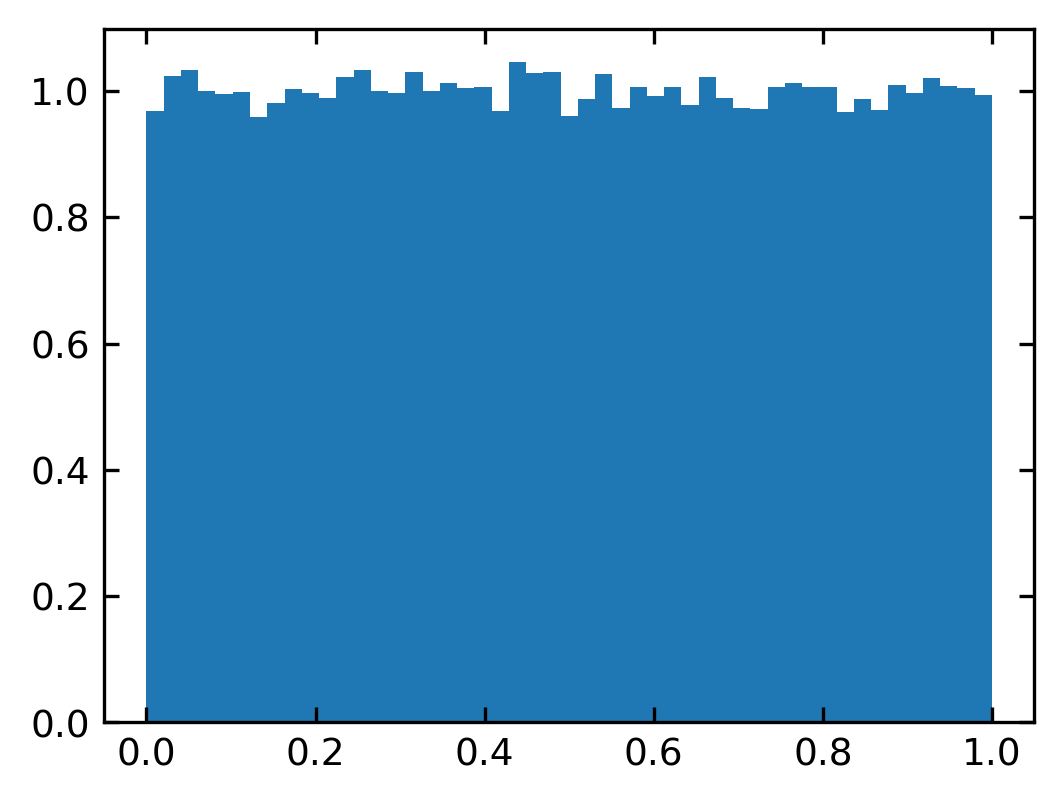

In [13]:
b=np.linspace(0,1,50)
n,bins,_=plt.hist(rand(100000),bins=b,density=1)
plt.show()

## Normally distributed random numbers

The function `randn(num)` produces a normal or Gaussian distribution of num random numbers with a mean of $\mu=0$ and a standard deviation of $\sigma=1$. They are distributed according to

\begin{equation}
p(x)dx=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx
\end{equation}

Similarly as all the other random number function, you may supply one or multiple arguments to the *rand()* function. The result is again a multi-dimensional array of random numbers.

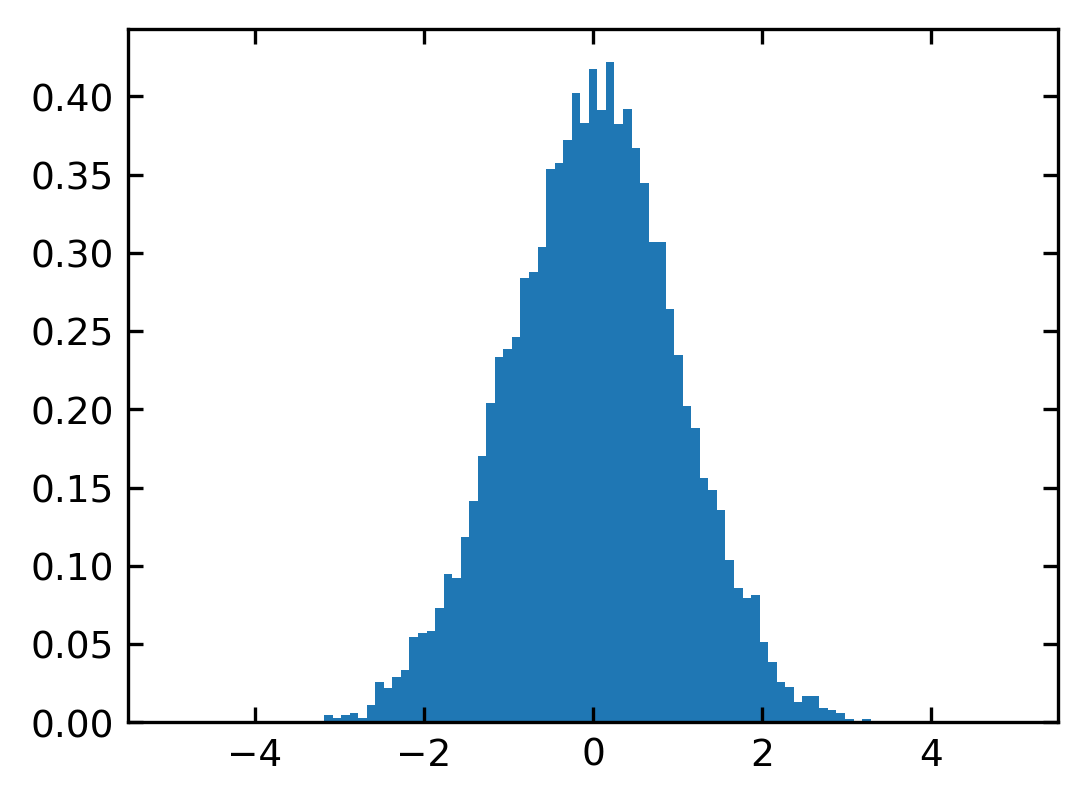

In [14]:
b=np.linspace(-5,5,100)
plt.hist(randn(10000),bins=b,density=1)
plt.show()

If you want to create a normal distribution with different standard deviation and mean value, you have to multiply by the new standard deviation and add the mean.

In [15]:
sigma=10
mu=10

d=sigma * randn(1000) + mu

<div class="alert alert-info">

**Note:** Physics Interlude

Brownian Motion, Random Walk


</div>

The following lines create random numbers, which are distributed by a normal distribution. You can use such normally distributed random numbers to generate a random walk. Such a random walk is a simple representation of Brownian motion of colloids suspended in a liquid.

Suppose a colloidal particle in solution is kicked by its surrounding solvent molecules such that it does a small step $(\Delta x_i,\Delta y_i)$ in a random direction. The length of the step $(\Delta x_i,\Delta y_i)$ will be normally distributed. If this motion is in 2 dimensions, then the position in x and y direction after N steps is 

\begin{equation}
x(N)=\sum_{i=1}^{N}\Delta x_{i}
\end{equation}

\begin{equation}
y(N)=\sum_{i=1}^{N}\Delta y_{i}
\end{equation}



The position is therefore just the sum of a sequence of normally distributed random numbers, which is easy to realize in Python with the `np.sum()` function of `numpy`. One can even go a little bit farther by evaluating the sum at each index $i$ and not just only the result after $N$ steps. A function providing this results is `np.cumsum()`, the cummulative sum.

In [21]:
x,y=[10*randn(100).cumsum(),10*randn(100).cumsum()]

Note that the above example uses the `cumsum()` function. The cumsum function of an array of number $[x_0,x_1,x_2,..,x_n]$ delivers an array with a progressive sum of elements $[x_0,x_0+x_1,x_0+x_1+x_2,...,x_0+...+x_n]$.
The line 

~~~
x,y=[randn(1000).cumsum(),randn(1000).cumsum()]
~~~

is therefore all you need to generate a random walk in two dimensions.

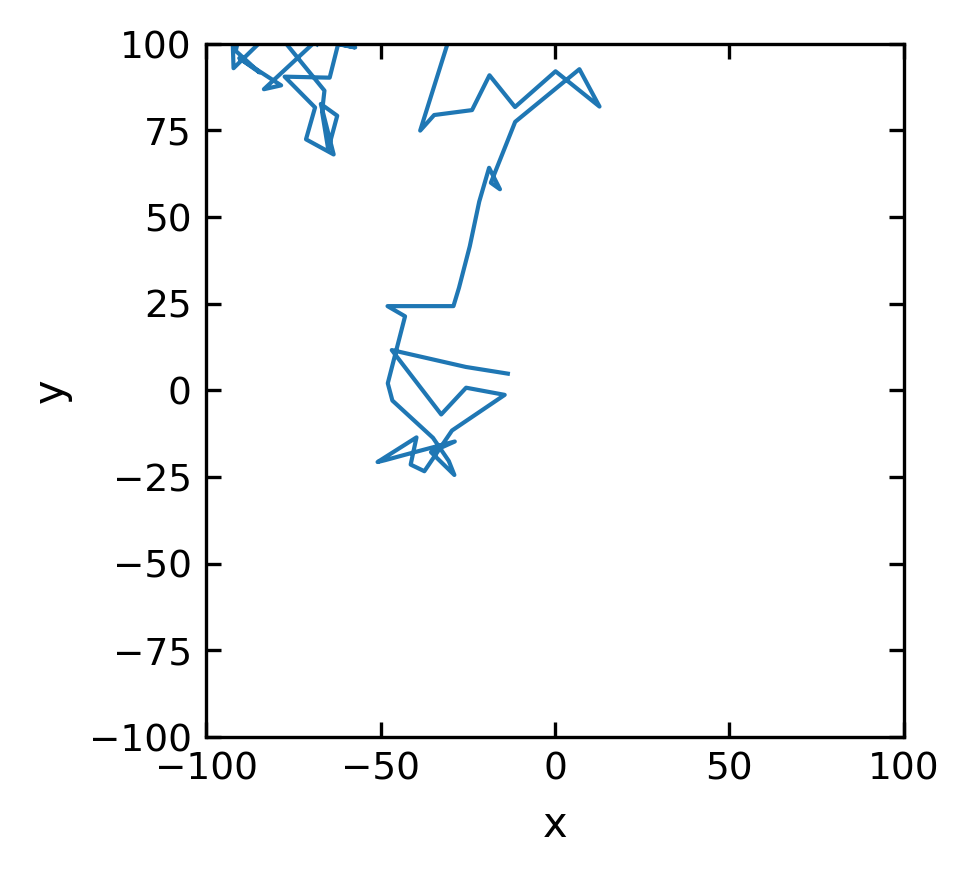

In [22]:
plt.figure(figsize=(3,3))
plt.plot(x,y,'-')
plt.xlabel('x') # set the x-axis label
plt.ylabel('y') # set the y-axis label
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.show()

## Exponentially distributed numbers

A number of processes in physics reveal an exponential statistics. For example the probability to find a molecule under gravity at a certain height $h$ is distributed by a Boltzmann law for a non-zero temperature. 

\begin{equation}
p(h)dh = p_{0}\exp(-m\cdot g\cdot h/k_{\rm B}T) dh
\end{equation}

On the other hand, the probability to emit a photon spontaneously after a certain time $t$ follwings the excited state preparation (two level system) is also exponentially distributed. 

\begin{equation}
p(t)dt=p_{0}\exp(-t/\tau)dt
\end{equation}

Thus after each excitation i.e. by a laser pulse, a molecule emits a single photon with the probability $p(t)$ and the whole exponential character in the statistics is only appearing after repeating the experiment several times. 

The exponential distribution of `numpy` can be supplied with two numbers.

~~~
exponential(b, n)
~~~

The parameter b  is giving the decay parameter. The number n is optional and giving the number of samples to be provided. The numbers are distributed according to

\begin{equation}
\frac{1}{b}\exp(-x/b)
\end{equation}


In [23]:
exponential(1)

1.6707767696904037

In [24]:
exponential(1,10000)

array([1.23963345, 0.25625115, 1.56007389, ..., 0.34832722, 1.05943601,
       1.21512793])

You may want to test the changes in the exponential distribution with the parameter **b**.

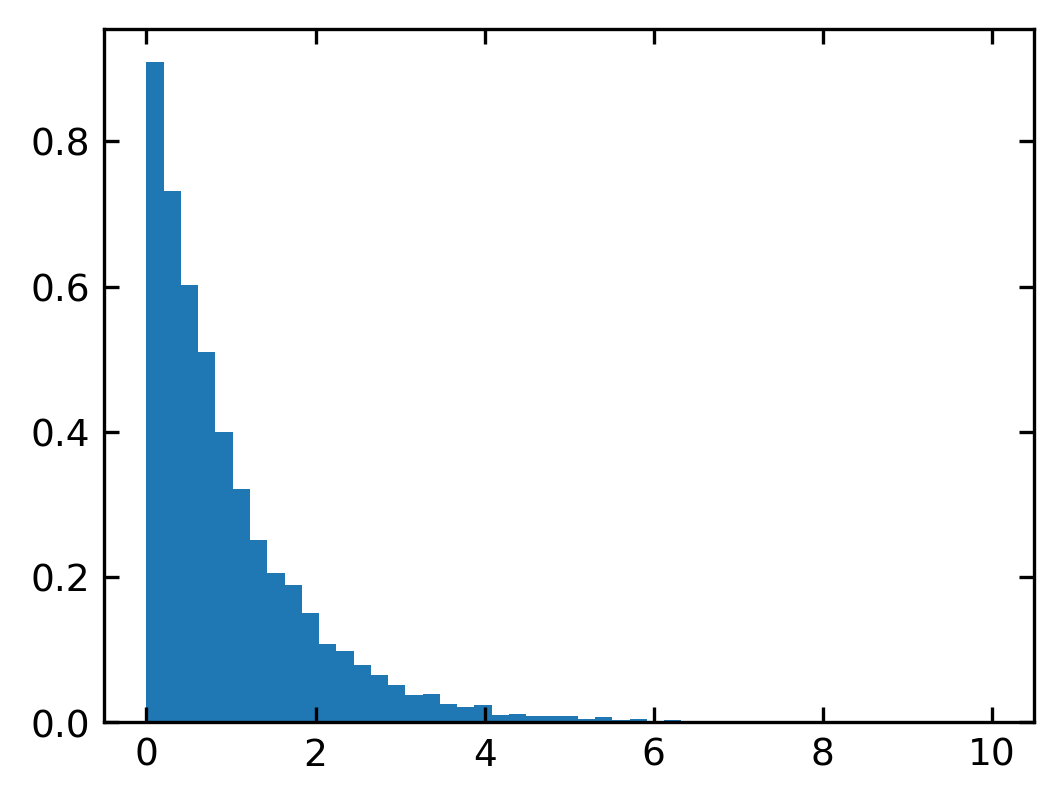

In [27]:
b=np.linspace(0,10,50)
n,bins,_=plt.hist(exponential(1,10000),bins=b,density=1)
plt.show()

## Central Limit theorem

<div class="alert alert-info">

**Note:** Statistics Interlude

The central limit theorem (CLT) is a fundamental concept in statistics that describes the behavior of the sum or average of many independent random variables, even if the original variables themselves are not normally distributed.

- Consider a population with a mean $\mu$ and a finite variance $\sigma^2$.
- Take random samples of size $n$ from this population and calculate the sample mean for each sample.
- The central limit theorem states that as the sample size $n$ increases, the distribution of the sample means will approach a normal distribution, regardless of the original distribution of the population.
- The mean of the sampling distribution of the sample means will be equal to the population mean $\mu$.
- The standard deviation of the sampling distribution of the sample means will be $\sigma/\sqrt{n}$ , where $\sigma$ is the population standard deviation.

The intuition behind the central limit theorem is that when many independent random variables are combined, the cumulative effect of their different distributions tends to cancel out and the resulting sum or average converges to a normal distribution due to the central tendency of the data.

This theorem is extremely useful in statistics as it allows us to draw conclusions about the parameters of the population based on sample data, even if the original population distribution is unknown or non-normal. It justifies the use of many statistical methods that assume normality, such as hypothesis testing, confidence intervals and regression analysis, as long as the sample size is sufficiently large.

The central limit theorem is considered one of the most important and remarkable results in probability theory and statistics and has numerous applications in various fields, including science, engineering, finance and social sciences.

Below is a code, that demonstrates the central limit theorem using and exponential distribution and different sample sizes.
    
</div>

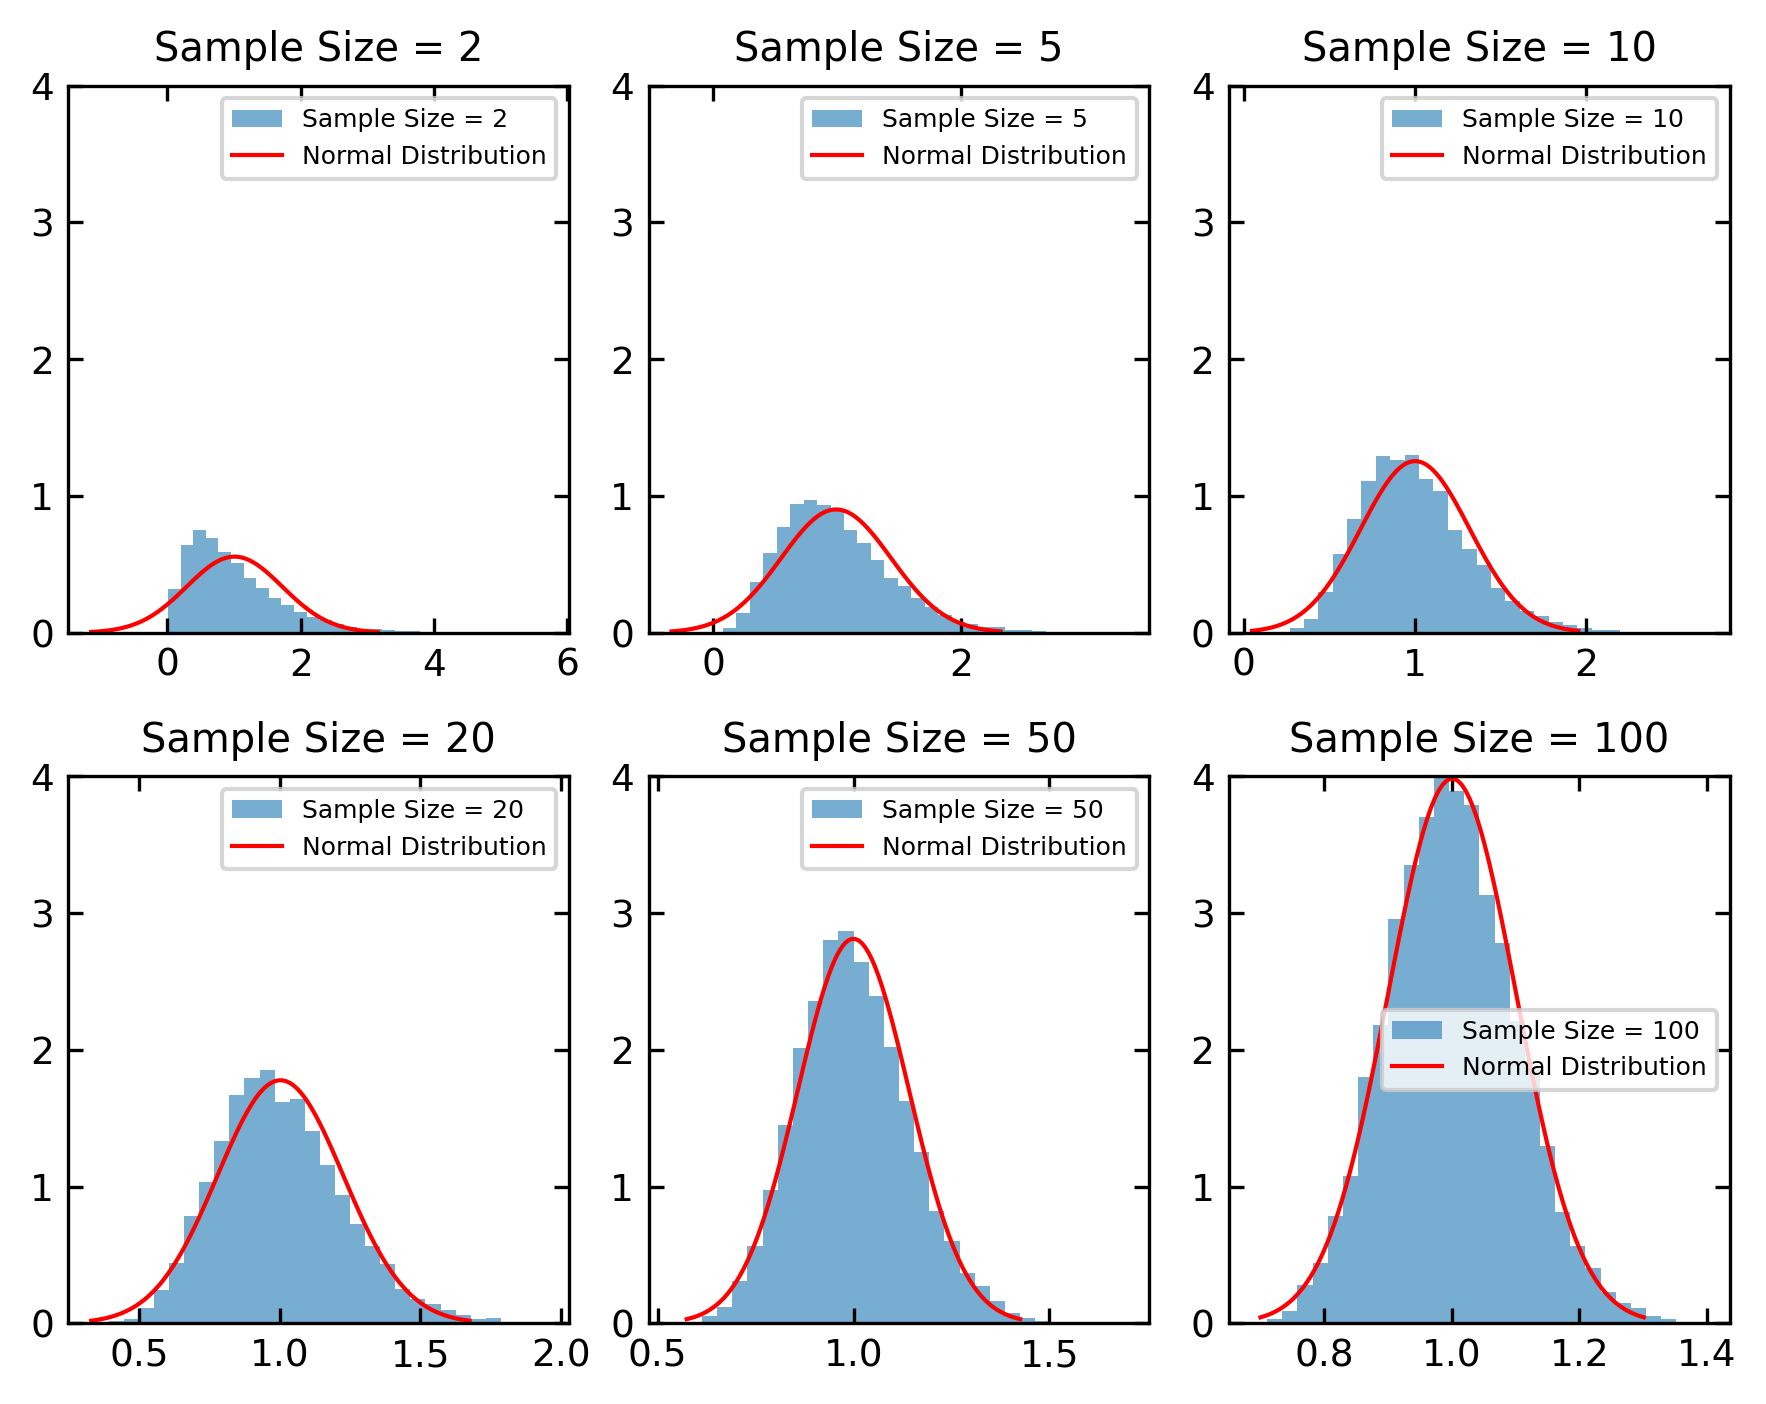

In [31]:
population_dist = np.random.exponential

sample_sizes = [2, 5, 10, 20, 50, 100]

num_samples = 10000

sample_means = {size: [np.mean(population_dist(scale=1, size=size)) for _ in range(num_samples)] for size in sample_sizes}

fig, axes = plt.subplots(2, 3, figsize=get_size(15, 12))
axes = axes.flatten()

for ax, size in zip(axes, sample_sizes ):
    
    ax.hist(sample_means[size], bins=30, density=True, alpha=0.6, label=f'Sample Size = {size}')
    
    mean = np.mean(sample_means[size])
    std = np.std(sample_means[size])
    x = np.linspace(mean - 3*std, mean + 3*std, 100)
    y = np.exp(-(x - mean)**2 / (2 * std**2)) / (np.sqrt(2 * np.pi) * std)
    ax.plot(x, y, 'r', lw=1, label='Normal Distribution')
    ax.set_ylim(0,4)
    ax.set_title(f'Sample Size = {size}')
    ax.legend()

plt.tight_layout()
plt.show()

## Random distribution of integers

The function randint(low, high, num) produces a uniform random distribution of num integers between low (inclusive) and high (exclusive).

In [32]:
randint(1,20,10)

array([ 1, 19, 10, 15, 14, 11,  3, 18, 12, 11])

In [33]:
items = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
shuffle(items)

print(items)

[6, 5, 4, 1, 2, 8, 9, 10, 7, 3]


There are a number of other methods available in the random module of numpy. Please refere to the [documentation](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html).